<a href="https://colab.research.google.com/github/Akshatasthana18/Celebal25/blob/main/titanic_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [23]:
df = sns.load_dataset('titanic')

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [29]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

<ipython-input-29-eaddc4ed4f9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-29-eaddc4ed4f9a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [30]:
df.drop(columns=['embark_town'], inplace=True)

In [31]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [32]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)


In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,no,False,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,yes,True,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,yes,False,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,no,True,False,True


In [34]:
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

In [35]:
df['who'] = df['who'].map({'man': 1, 'woman': 2})
df['alive'] = df['alive'].map({'yes': 1, 'no': 0})
#df['alone'] = df['alone'].map({'False': 0, 'True': 1})
#df['embarked_Q'] = df['embarked_Q'].map({'False': 0, 'True': 1})
#df['embarked_S'] = df['embarked_S'].map({'False': 0, 'True': 1})

In [36]:
df.drop(columns=['adult_male'], inplace=True)

In [41]:
df['who'].fillna(df['who'].median(), inplace=True)

<ipython-input-41-298f2363d072>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['who'].fillna(df['who'].median(), inplace=True)


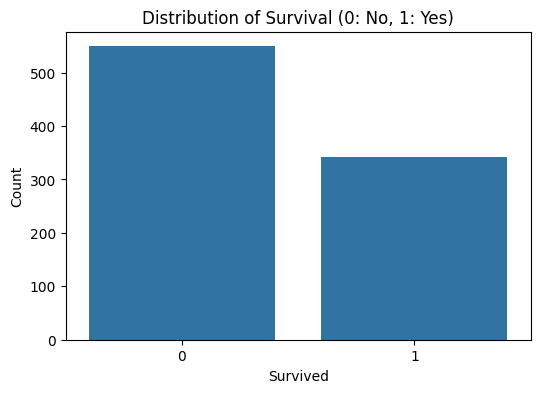

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Survival (0: No, 1: Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [42]:
X = df.drop('survived', axis=1)
y = df['survived']

In [43]:
X

,pclass,sex,age,sibsp,parch,fare,class,who,alive,alone,embarked_Q,embarked_S
0,3,0,22.0,1,0,7.2500,3,1.0,0,False,False,True
1,1,1,38.0,1,0,71.2833,1,2.0,1,False,False,False
2,3,1,26.0,0,0,7.9250,3,2.0,1,True,False,True
3,1,1,35.0,1,0,53.1000,1,2.0,1,False,False,True
4,3,0,35.0,0,0,8.0500,3,1.0,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2,1.0,0,True,False,True
887,1,1,19.0,0,0,30.0000,1,2.0,1,True,False,True
888,3,1,28.0,1,2,23.4500,3,2.0,0,False,False,True
889,1,0,26.0,0,0,30.0000,1,1.0,1,True,False,False


In [44]:
print(X.isnull().sum())

pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
alive         0
alone         0
embarked_Q    0
embarked_S    0
dtype: int64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

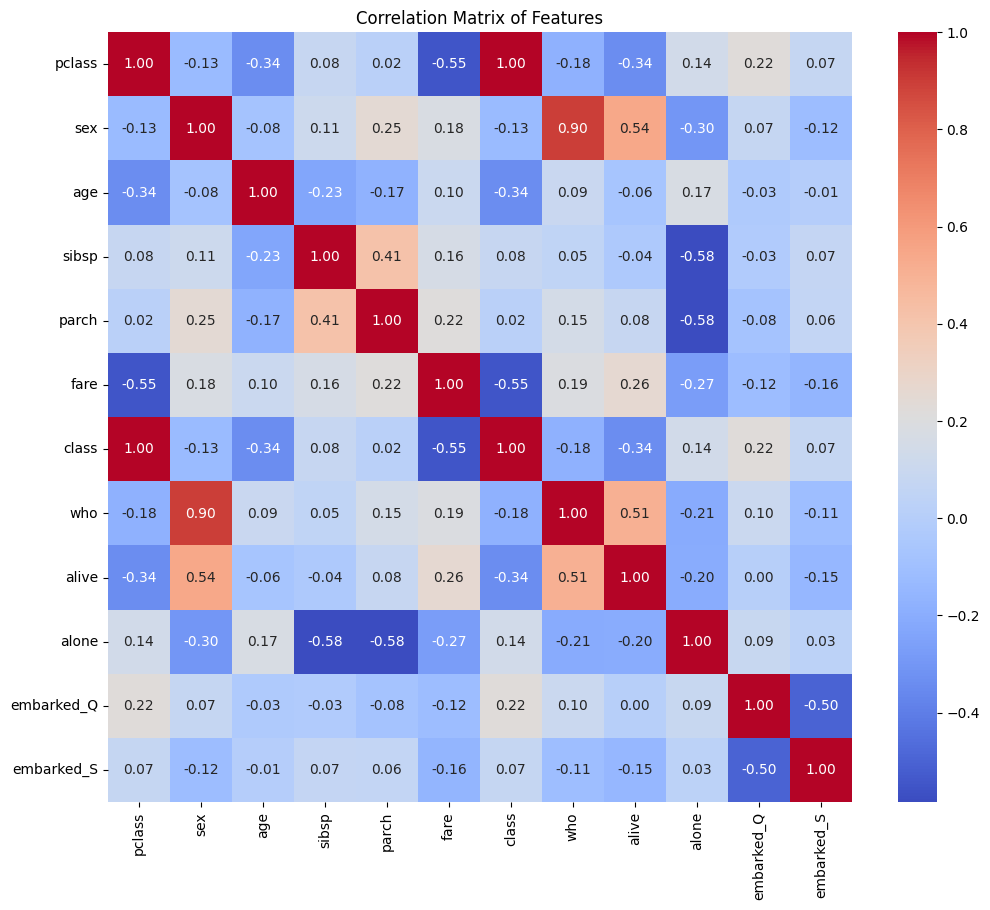

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [46]:
y_pred = model.predict(X_test)

In [47]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


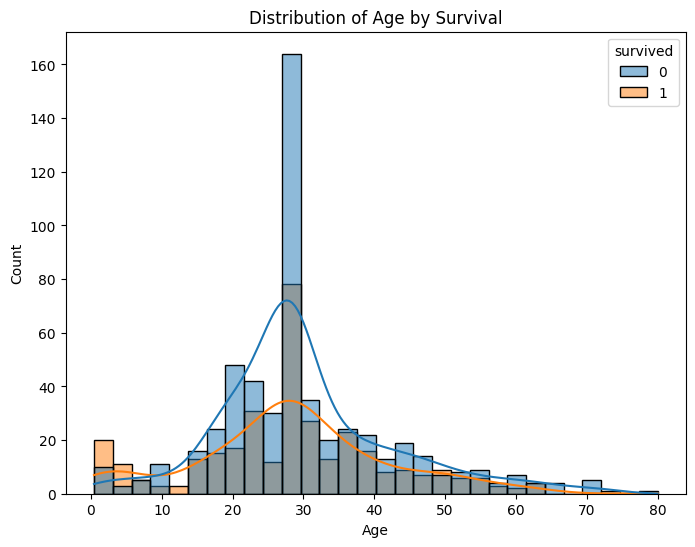

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

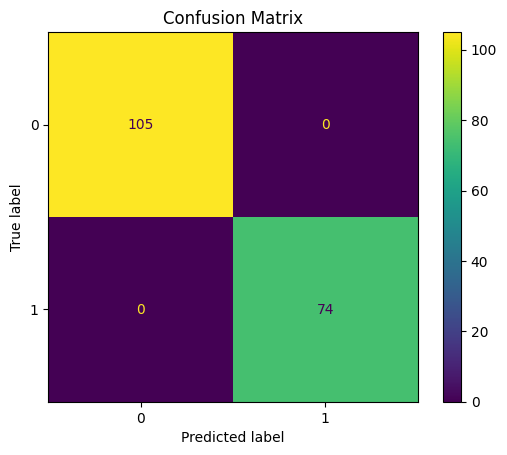

In [54]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

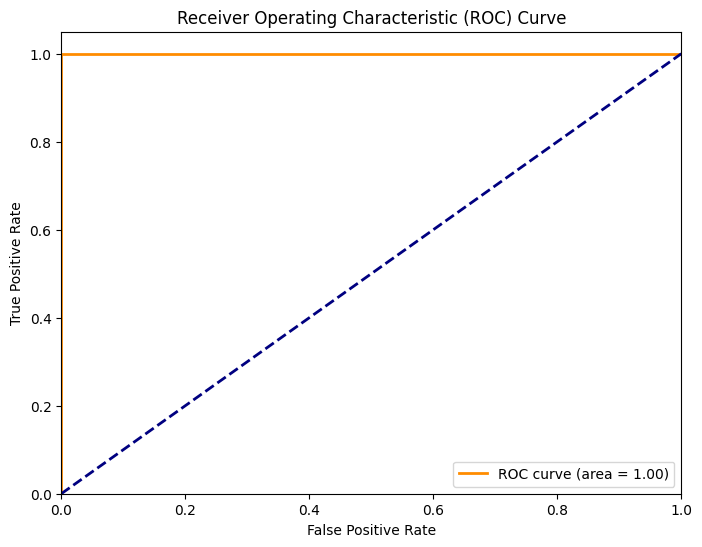

In [55]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()